In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('ab_browser_test.csv')

In [6]:
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [43]:
df.shape

(566134, 6)

### 1

In [16]:
n1 = sum(df[df['slot'] == 'exp'].n_clicks)

In [17]:
n2 = sum(df[df['slot'] == 'control'].n_clicks)

In [37]:
print n1
print n2
print round((float(n1 - n2)/n2) *100, 3)

3261823
3210027
1.614


### 2

In [38]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [40]:
exp_clicks = df[df['slot'] == 'exp'].n_clicks.values
control_clicks = df[df['slot'] == 'control'].n_clicks.values

#### Интервальная оценка для  разности средних

In [53]:
np.random.seed(0)

exp_clicks_scores = map(np.mean, get_bootstrap_samples(exp_clicks, 1000))
control_clicks_scores = map(np.mean, get_bootstrap_samples(control_clicks, 1000))

delta_mean_scores = map(lambda x: x[1] - x[0], zip(exp_clicks_scores, control_clicks_scores))

print "95% confidence interval for the difference between means",  stat_intervals(delta_mean_scores, 0.05)
print "95% confidence interval for exp_clicks_scores means",  stat_intervals(exp_clicks_scores, 0.05)
print "95% confidence interval for control_clicks_scores means",  stat_intervals(exp_clicks_scores, 0.05)


95% confidence interval for the difference between means [-0.40475697 -0.19172563]
95% confidence interval for exp_clicks_scores means [11.5086867  11.66089388]
95% confidence interval for control_clicks_scores means [11.5086867  11.66089388]


#### Интервальная оценка для разности медиан

In [52]:
np.random.seed(0)

exp_clicks_scores = map(np.median, get_bootstrap_samples(exp_clicks, 1000))
control_clicks_scores = map(np.median, get_bootstrap_samples(control_clicks, 1000))

delta_median_scores = map(lambda x: x[1] - x[0], zip(exp_clicks_scores, control_clicks_scores))

print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)
print "95% confidence interval for the exp_clicks_scores:",  stat_intervals(exp_clicks_scores, 0.05)
print "95% confidence interval for control_clicks_scores:",  stat_intervals(control_clicks_scores, 0.05)

95% confidence interval for the difference between medians [-1. -1.]
95% confidence interval for the exp_clicks_scores: [5. 5.]
95% confidence interval for control_clicks_scores: [4. 4.]


In [56]:
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(control_clicks)

Shapiro-Wilk normality test, W-statistic: 0.537249, p-value: 0.000000


/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [58]:
from scipy.stats import( kstest, poisson)
kstest(exp_clicks,'poisson', args=(1,), alternative = 'greater')

KstestResult(statistic=0.0, pvalue=1.0)

### 4

In [77]:
np.random.seed(0)
n_boot_samples = 500

control_boot = get_bootstrap_samples(control_clicks, n_boot_samples)

In [78]:
control_boot_mean = map(np.mean, control_boot)

In [89]:
delta = map(lambda x: (x[0] - x[1])**2, zip(control_boot, control_boot_mean))

In [91]:
control_boot_chi_squared = map(lambda x: np.sum(x), delta)

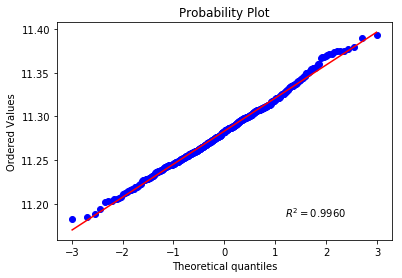

In [103]:
scipy.stats.probplot(control_boot_mean, dist = 'norm', plot = plt, rvalue = True)
plt.show()

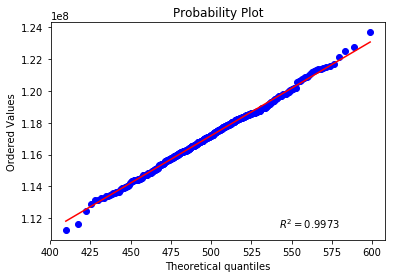

In [114]:
scipy.stats.probplot(control_boot_chi_squared, dist = "chi2", sparams=(499), plot = plt, rvalue = True)
plt.show()

### 5

In [150]:
exp_users = df[df.slot == 'exp'][['userID', 'n_queries']]
control_users = df[df.slot == 'control'][['userID', 'n_queries']]

In [151]:
import collections
notunique_exp_users = [item for item, count in collections.Counter(exp_users.userID.values).items() if count > 1]
notunique_control_users = [item for item, count in collections.Counter(control_users.userID.values).items() if count > 1]

In [153]:
aggregation_functions = {'userID': 'first', 'n_queries': 'sum'}
exp_users_arr = exp_users.groupby(exp_users['userID']).aggregate(aggregation_functions)
control_users_arr = control_users.groupby(control_users['userID']).aggregate(aggregation_functions)

In [158]:
stats.mannwhitneyu(exp_users_arr.n_queries, control_users_arr.n_queries)

MannwhitneyuResult(statistic=39863768597.0, pvalue=0.0050047729633395524)

### 6

In [25]:
import collections
exp_browsers = df[df.slot == 'exp'].browser
exp_browsers_list = [item for item, count in collections.Counter(exp_browsers).items() if count > 1]

In [26]:
control_browsers = df[df.slot == 'control'].browser
control_browsers_list = [item for item, count in collections.Counter(control_browsers).items() if count > 1]

In [27]:
control_browsers_list 

['Browser #2',
 'Browser #4',
 'Browser #22',
 'Browser #20',
 'Browser #17',
 'Browser #14']

In [28]:
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [39]:
ls = []
for i in control_browsers_list:
    x = df[df.slot == 'exp'][df.browser == i].n_clicks
    y = df[df.slot == 'control'][df.browser == i].n_clicks
    ls.append(stats.mannwhitneyu(x, y)[1])
#df[df.browser == 'Browser #2'][]

/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will 

In [40]:
print ls

[0.0272438604197241, 0.40760617658454984, 0.2574055152210032, 0.45366656388735377, 0.03740060143010802, 0.0]


In [41]:
from statsmodels.sandbox.stats.multicomp import multipletests 
reject, p_corrected, a1, a2 = multipletests(ls, 
                                            alpha = 0.05, 
                                            method = 'holm') 

In [42]:
for i in p_corrected:
    print i

0.13621930209862051
0.8152123531690997
0.7722165456630096
0.8152123531690997
0.14960240572043207
0.0


In [43]:
reject

array([False, False, False, False, False,  True])

### 7

In [34]:
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [5]:
from collections import Counter
Counter(df.browser)

Counter({'Browser #14': 89123,
         'Browser #17': 32607,
         'Browser #2': 110737,
         'Browser #20': 33929,
         'Browser #22': 142905,
         'Browser #4': 156833})

In [18]:
dic = {}
for browser in Counter(df.browser):
    ls = []
    for slot in Counter(df.slot):
        x = df[df.browser == browser][df.slot == slot]
        ls.append(100 * float(sum(x.n_nonclk_queries))/sum(x.n_queries))
    dic[browser] = ls
print dic         
    

/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/and

{'Browser #2': [45.96274717919465, 44.982746948554706], 'Browser #4': [46.97092963514274, 45.14294190358467], 'Browser #22': [40.593976593513354, 39.85394721969546], 'Browser #20': [40.540484743383296, 38.97737648371716], 'Browser #17': [36.29936674628209, 36.93741284866483], 'Browser #14': [57.59041136008114, 43.755617361273295]}


/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
